In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#Data Collection
#mengimpor dataset dan menyimpan dalam dataframe
path = "..\Dataset\API_Kaggle\china_gdp.csv"
df = pd.read_csv(path)
df

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10
5,1965,6.970915e+10
6,1966,7.587943e+10
7,1967,7.205703e+10
8,1968,6.999350e+10
9,1969,7.871882e+10


In [4]:
df.describe()

,Year,Value
count,55.00000,5.500000e+01
mean,1987.00000,1.437042e+12
std,16.02082,2.500085e+12
min,1960.00000,4.668518e+10
25%,1973.50000,1.395123e+11
50%,1987.00000,3.074796e+11
75%,2000.50000,1.268748e+12
max,2014.00000,1.035483e+13


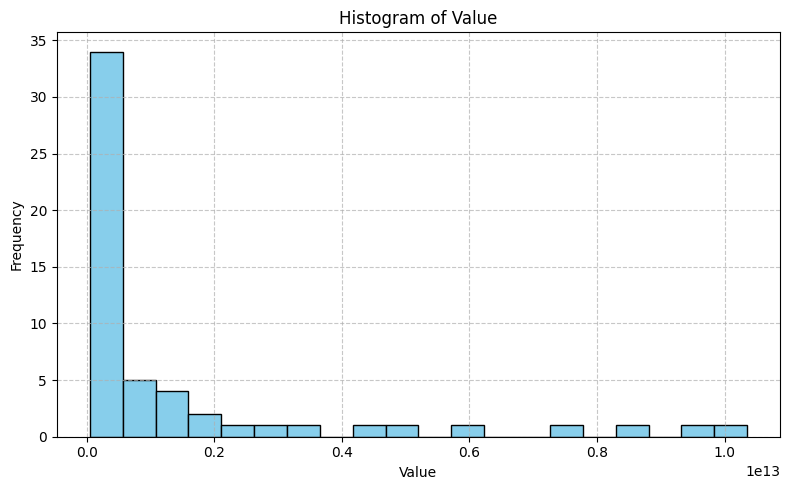

In [6]:
plt.figure(figsize=(8, 5))
plt.hist(df ['Value'].values, bins=20, edgecolor='black', color='skyblue' )
plt. title("Histogram of Value")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout ()
plt.show()

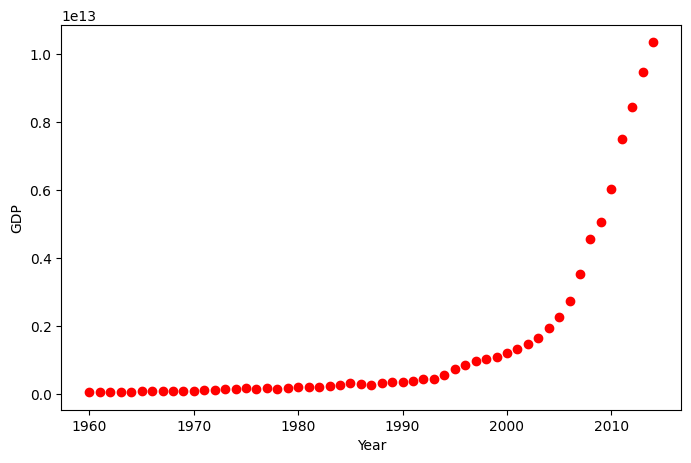

In [7]:
#Data Visualization
#melihat hubungan linearitas fitur
#dengan diagram visualisasi
plt.figure(figsize=(8,5))
x_data, y_data = (df ["Year"].values, df ["Value"].values)
plt.plot(x_data, y_data, 'ro' )
plt.ylabel('GDP')
plt.xlabel('Year')
plt. show()

In [8]:
df.isna().sum()

Year     0
Value    0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    55 non-null     int64  
 1   Value   55 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1008.0 bytes


In [10]:
def logistic(x, Beta_1, Beta_2):
    y= 1/ (1 + np.exp(-Beta_1 * (x - Beta_2)))
    return y

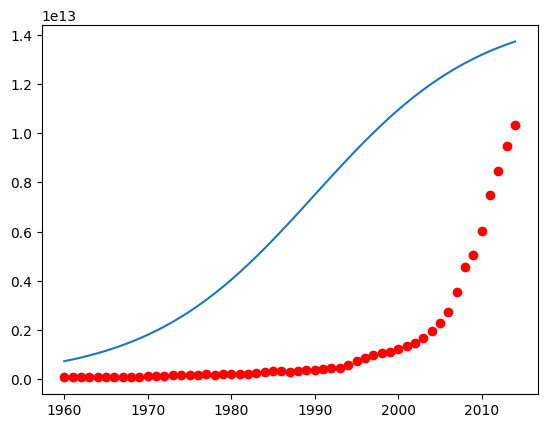

In [11]:
beta_1 = 0.10
beta_2 = 1990.0

#logistic function
Y_pred = logistic(x_data, beta_1, beta_2)

#plot initial prediction against datapoints
plt.plot(x_data, Y_pred*15000000000000.)
plt.plot(x_data, y_data, 'ro' )

In [12]:
# Lets normalize our data
xdata =x_data/max(x_data)
ydata =y_data/max(y_data)

In [14]:
#membagi data dan membangun model
from scipy.optimize import curve_fit
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(
xdata, ydata, train_size=0.8, random_state = 42)

#membangun model dengan data latih
popt, pcov = curve_fit(logistic, train_x, train_y)

#memprediksi dengan data uji
y_hat = logistic(test_x, *popt)
max_x = max(x_data)
max_y = max(y_data)

hasil = {
    "Year_norm" : test_x,
    "ActualValue_norm": test_y.flatten(),
    "PredictedValue_norm": y_hat. flatten(),
    "Err_norm": np.abs(y_hat.flatten() - test_y.flatten())/test_y.flatten(),
    "Year" : test_x * max_x,
    "ActualValue": test_y. flatten() * max_y,
    "PredictedValue": y_hat. flatten() * max_y,
    "Selisih" : np.abs( y_hat.flatten() * max_y - test_y.flatten()*max_y),
    "Err" : np.abs( y_hat. flatten() * max_y - test_y.flatten() *max_y)/(test_y.flatten()*max_y)}

#load data into a DataFrame object:
dfhasil = pd.DataFrame(hasil)
dfhasil

,Year_norm,ActualValue_norm,PredictedValue_norm,Err_norm,Year,ActualValue,PredictedValue,Selisih,Err
0,0.988580,0.036838,2.075128e-03,0.943669,1991.0,3.814547e+11,2.148761e+10,3.599671e+11,0.943669
1,0.975670,0.006732,2.002751e-07,0.999970,1965.0,6.970915e+10,2.073815e+06,6.970708e+10,0.999970
2,0.989076,0.041037,2.958926e-03,0.927897,1992.0,4.249341e+11,3.063918e+10,3.942949e+11,0.927897
3,0.979643,0.013208,3.446802e-06,0.999739,1973.0,1.367699e+11,3.569105e+07,1.367342e+11,0.999739
4,0.982622,0.017080,2.912382e-05,0.998295,1979.0,1.768565e+11,3.015722e+08,1.765550e+11,0.998295
5,0.997517,0.488605,5.564460e-01,0.138847,2009.0,5.059420e+12,5.761904e+12,7.024845e+11,0.138847
6,0.993545,0.128658,6.794058e-02,0.471930,2001.0,1.332235e+12,7.035133e+11,6.287215e+11,0.471930
7,0.986097,0.028857,3.510956e-04,0.987833,1986.0,2.988058e+11,3.635536e+09,2.951703e+11,0.987833
8,0.994538,0.159339,1.292749e-01,0.188680,2003.0,1.649929e+12,1.338620e+12,3.113084e+11,0.188680
9,0.979146,0.010832,2.415143e-06,0.999777,1972.0,1.121598e+11,2.500840e+07,1.121348e+11,0.999777


In [15]:
print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

 beta_1 = 716.358019, beta_2 = 0.997201


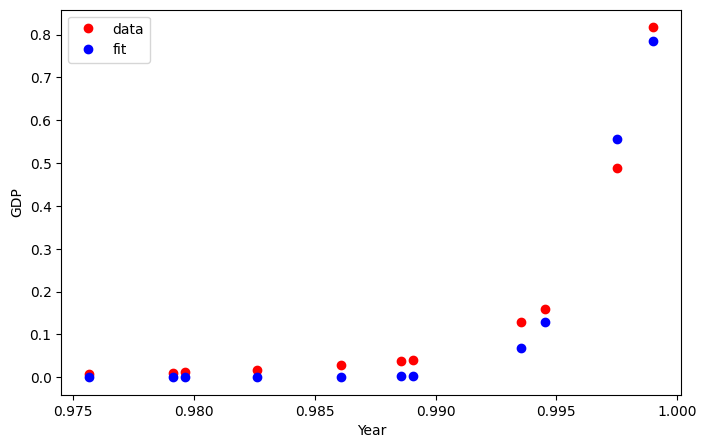

In [16]:
plt.figure(figsize=(8,5))
plt.plot(test_x, test_y, 'ro', label='data' )
plt.plot(test_x, y_hat, 'bo', label='fit' )
plt. legend (loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

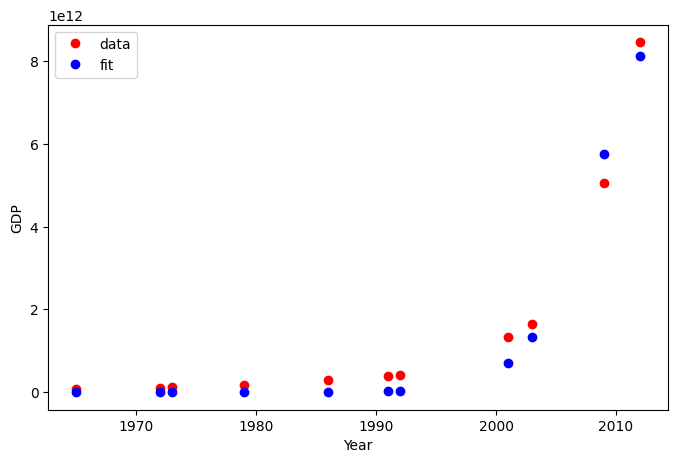

In [17]:
plt.figure(figsize=(8,5))
plt.plot(test_x*max_x, test_y*max_y, 'ro', label='data' )
plt.plot(test_x*max_x, y_hat*max_y, 'bo', label='fit' )
plt. legend (loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

In [20]:
#Model Evaluation
#mengevaluasi model regresi dengan metriks:
#MAE, MSE, RMSE dan R Squared Score dengan function

from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(test_y, y_hat)
mape = mean_absolute_percentage_error(test_y, y_hat)
mse = mean_squared_error(test_y, y_hat)
rmse = np.sqrt (mse)
r_squared = r2_score(test_y, y_hat)

print(f"Mean Absolute Error (MAE): {mae:,.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape*100:,.2f}%")
print(f"Mean Squared Error (MSE): {mse:,.7f}")
print(f"Root Mean Squared Error (RMSE): {rmse:,.5f}")
print(f"R squared score: {r_squared:.2f}")

Mean Absolute Error (MAE): 0.03
Mean Absolute Percentage Error (MAPE): 69.97%
Mean Squared Error (MSE): 0.0013036
Root Mean Squared Error (RMSE): 0.03611
R squared score: 0.98


In [21]:
df_norm = {
"Year": xdata. flatten(),
"Value": ydata. flatten(),
}
#load data into a DataFrame object:
df_norm = pd.DataFrame(df_norm)
df_norm.describe()

,Year,Value
count,55.000000,55.000000
mean,0.986594,0.138780
std,0.007955,0.241441
min,0.973188,0.004509
25%,0.979891,0.013473
50%,0.986594,0.029694
75%,0.993297,0.122527
max,1.000000,1.000000


In [23]:
#Model Evaluation
#mengevaluasi model regresi dengan metriks:
#MAE, MSE, RMSE dan R Squared Score dengan function

from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

test_asli = test_y * max_y
pred_asli = y_hat * max_y

mae = mean_absolute_error(test_asli, pred_asli)
mape = mean_absolute_percentage_error(test_asli, pred_asli)
mse = mean_squared_error(test_asli, pred_asli)
rmse = np. sqrt (mse)
r_squared = r2_score(test_asli, pred_asli)

print(f"Mean Absolute Error (MAE): {mae:,.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape*100:,.2f}%")
print(f"Mean Squared Error (MSE): {mse:,.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:,.2f}")
print(f"R squared score: {r_squared :.2f}")

Mean Absolute Error (MAE): 320,209,475,540.00
Mean Absolute Percentage Error (MAPE): 69.97%
Mean Squared Error (MSE): 139,776,032,067,286,487,531,520.00
Root Mean Squared Error (RMSE): 373,866,329,143.57
R squared score: 0.98


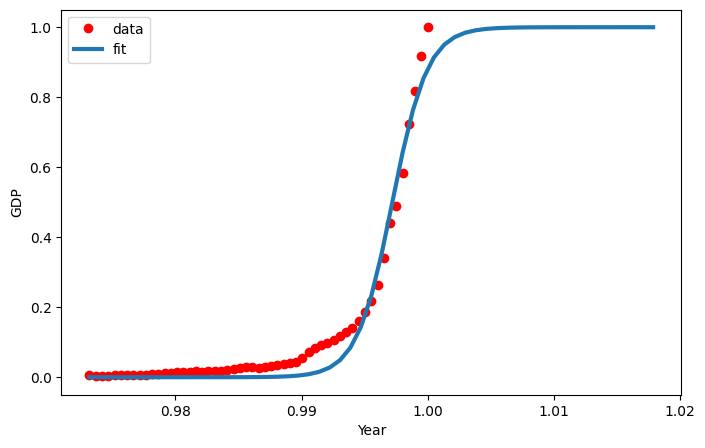

In [24]:
x = np.linspace(1960, 2050, 55)
x = x/max_x
plt.figure(figsize=(8,5))
y = logistic(x, *popt)
plt.plot(xdata, ydata, 'ro', label='data' )
plt.plot(x,y, linewidth=3.0, label='fit')
plt. legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

In [26]:
# Meminta input dari user
year = float(input("Masukkan tahun yang ingin dipredisi: ") )

# Membentuk DataFrame dengan nama kolom yang sesuai
data_input = year/max_x

# Melakukan prediksi dengan model logistic
gdp = logistic(data_input, *popt)

# Menampilkan hasil
print(f"\nPrediksi Performance Index: {gdp*max_y:,.2f}")


Prediksi Performance Index: 6,643,955,750,550.56
